In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the dataset
data = pd.read_excel('Assignment2Data.xlsx')

# Preparing the data

In [4]:
# Convert annualized interest rates to monthly rates
data['MonthlyInterestRate'] = ((1 + data['InterestRate'] / 100) ** (1/12)) - 1

# Convert annualized US interest rates to monthly rates
data['MonthlyUSRate'] = ((1 + data['USr'] / 100) ** (1/12)) - 1

data = data.sort_values(by=['country', 'year', 'month'])

# Calculate the return for each month based on the previous month's interest rate
data['MonthlyReturn'] = data.groupby('country')['MonthlyInterestRate'].shift(1)

data['MonthlyReturn'].fillna(0, inplace=True)

In [5]:
data.head(10)

,country,month,year,InterestRate,Exrate,monthly,USr,mktrf,MonthlyInterestRate,MonthlyUSRate,MonthlyReturn
0,Australia,3,1991,11.170,1.2862,374,6.249,0.0265,0.008863,0.005064,0.000000
1,Australia,4,1991,10.805,1.2758,375,6.026,-0.0028,0.008587,0.004888,0.008863
2,Australia,5,1991,10.085,1.3164,376,6.174,0.0365,0.008039,0.005005,0.008587
3,Australia,6,1991,10.352,1.3033,377,6.307,-0.0494,0.008243,0.005110,0.008039
4,Australia,7,1991,9.973,1.2855,378,6.141,0.0424,0.007954,0.004979,0.008243
5,Australia,8,1991,10.103,1.2742,379,5.727,0.0232,0.008053,0.004652,0.007954
6,Australia,9,1991,9.431,1.2539,380,5.408,-0.0159,0.007539,0.004399,0.008053
7,Australia,10,1991,8.434,1.2765,381,5.088,0.0129,0.006770,0.004144,0.007539
8,Australia,11,1991,8.432,1.2742,382,4.672,-0.0419,0.006769,0.003812,0.006770
9,Australia,12,1991,7.076,1.3120,383,4.087,0.1084,0.005714,0.003344,0.006769


# Question - 2

In [6]:
# Filter data for Japan and the USA
japan_data = data[data['country'] == 'Japan'][['month', 'year', 'MonthlyInterestRate', 'Exrate']]
us_data = data[data['country'] == 'US'][['month', 'year', 'MonthlyInterestRate']] 

merged_data = pd.merge(japan_data, us_data, how='inner', on=['month', 'year'], suffixes=('_JPY', '_USD'))

In [7]:
# Calculate the interest rate differential
merged_data['InterestRate_Differential'] = merged_data['MonthlyInterestRate_USD'] - merged_data['MonthlyInterestRate_JPY']

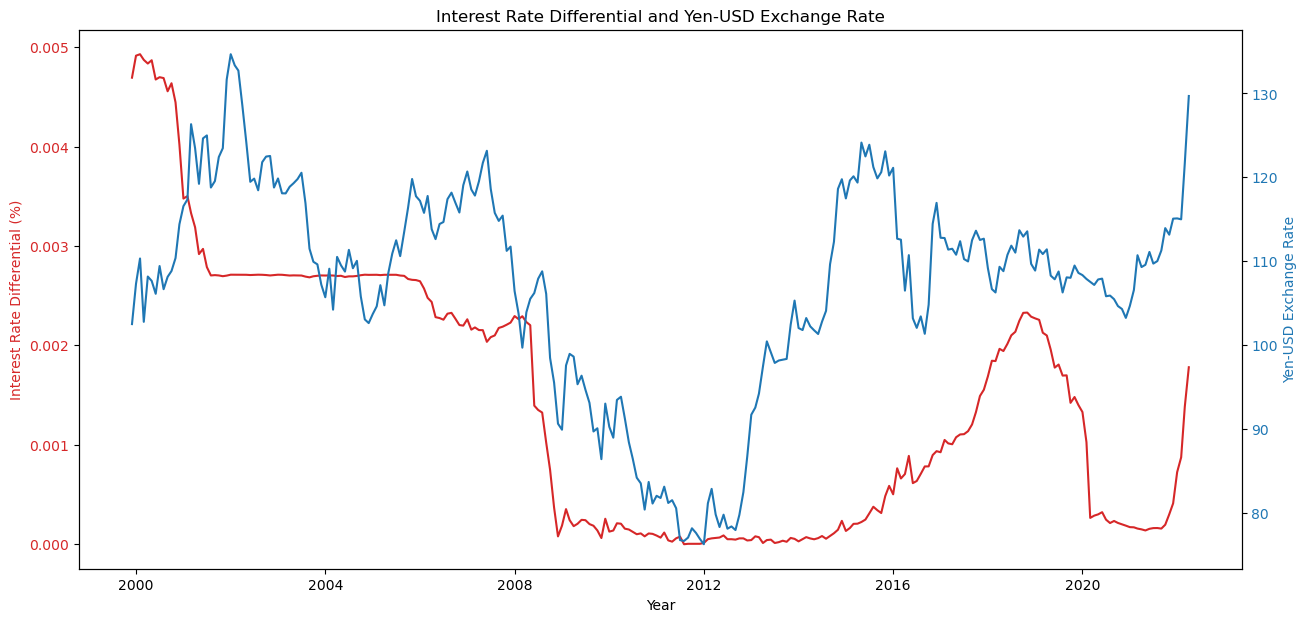

In [8]:
# Plotting the graph
fig, ax1 = plt.subplots(figsize=(15, 7))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Interest Rate Differential (%)', color=color)
ax1.plot(pd.to_datetime(merged_data[['year', 'month']].assign(DAY=1)), merged_data['InterestRate_Differential'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Yen-USD Exchange Rate', color=color)
ax2.plot(pd.to_datetime(merged_data[['year', 'month']].assign(DAY=1)), merged_data['Exrate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Interest Rate Differential and Yen-USD Exchange Rate')
plt.show()

Interest Rate Differential (Red Line): This line shows the difference between the interest rates in the USA and Japan over time. A higher value indicates that US interest rates are higher than those in Japan, potentially making the carry trade more attractive. Conversely, a lower or negative value suggests less advantage or even a disadvantage in engaging in the carry trade.

Yen-USD Exchange Rate (Blue Line): This line shows the exchange rate between the Japanese Yen and the US Dollar over time. A rising line indicates that the Yen is strengthening against the Dollar, which is generally unfavorable for the Yen-USD carry trade. A falling line means the Yen is weakening, which can be favorable for the carry trade.

# Question - 3

In [9]:
# Calculating the carry trade strategy with a focus on US investor perspective
principal = 100

# Step 1: Calculate the cost of borrowing in USD
borrowing_cost_usd = principal * data['MonthlyUSRate']

# Step 2: Convert borrowed USD to foreign currency using current month's exchange rate
borrowed_usd_in_foreign = principal * data['Exrate']

# Step 3: Calculate the return on investment in foreign currency
investment_return_end_of_month_foreign = borrowed_usd_in_foreign * (1 + data['MonthlyInterestRate'])

# Step 4: Convert the return on investment back to USD using next month's exchange rate
data['NextMonthExchangeRate'] = data.groupby('country')['Exrate'].shift(-1)
investment_return_end_of_month_usd = investment_return_end_of_month_foreign / data['NextMonthExchangeRate']

# Step 5: Calculate net monthly carry return
data['NetCarryReturnAdjusted'] = investment_return_end_of_month_usd - (principal + borrowing_cost_usd)

data.head()

,country,month,year,InterestRate,Exrate,monthly,USr,mktrf,MonthlyInterestRate,MonthlyUSRate,MonthlyReturn,NextMonthExchangeRate,NetCarryReturnAdjusted
0,Australia,3,1991,11.170,1.2862,374,6.249,0.0265,0.008863,0.005064,0.000000,1.2758,1.202320
1,Australia,4,1991,10.805,1.2758,375,6.026,-0.0028,0.008587,0.004888,0.008863,1.3164,-2.740788
2,Australia,5,1991,10.085,1.3164,376,6.174,0.0365,0.008039,0.005005,0.008587,1.3033,1.316641
3,Australia,6,1991,10.352,1.3033,377,6.307,-0.0494,0.008243,0.005110,0.008039,1.2855,1.709367
4,Australia,7,1991,9.973,1.2855,378,6.141,0.0424,0.007954,0.004979,0.008243,1.2742,1.191349


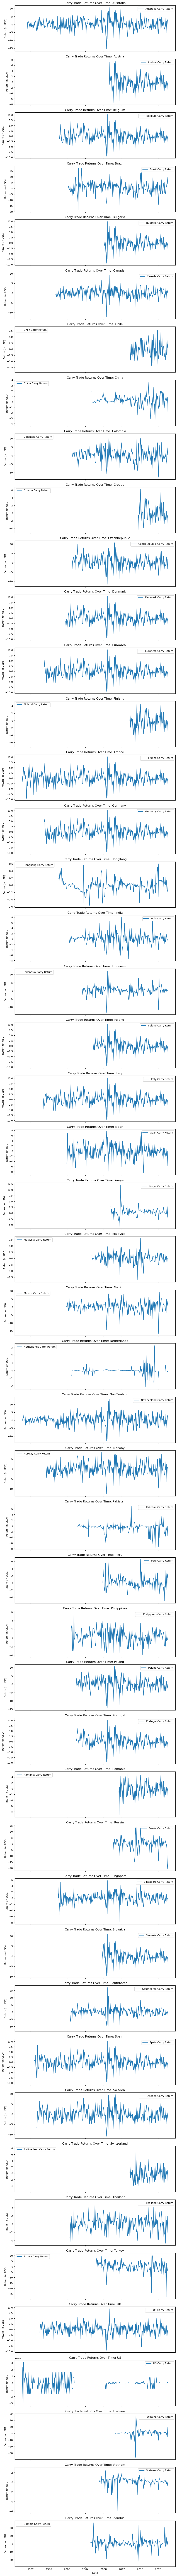

In [10]:
# Function to add months to a date
def add_months_to_date(start_date, months_to_add):
    return start_date + relativedelta(months=months_to_add)

# Function to calculate the difference in months from the start date
def month_difference(row, start_year, start_month):
    return (row['year'] - start_year) * 12 + row['month'] - start_month

# Function to convert 'monthly' to actual dates for each country
def convert_to_dates(data):
    unique_countries = data['country'].unique()
    for country in unique_countries:
        country_data = data[data['country'] == country]
        start_year = country_data['year'].min()
        start_month = country_data[country_data['year'] == start_year]['month'].min()

        start_date = pd.Timestamp(year=start_year, month=start_month, day=1)
        month_diff = country_data.apply(lambda row: month_difference(row, start_year, start_month), axis=1)
        data.loc[data['country'] == country, 'Date'] = month_diff.apply(lambda x: add_months_to_date(start_date, x))

# Convert 'monthly' to actual dates
convert_to_dates(data)

# Function to plot the time-series of monthly carry strategy returns for a subset of countries
def plot_carry_returns_subset(data, subset_countries):
    subset_data = data[data['country'].isin(subset_countries)]

    fig, axes = plt.subplots(len(subset_countries), 1, figsize=(10, 3 * len(subset_countries)), sharex=True)
    if len(subset_countries) == 1:
        axes = [axes]

    for i, country in enumerate(subset_countries):
        country_data = subset_data[subset_data['country'] == country]
        axes[i].plot(country_data['Date'], country_data['NetCarryReturnAdjusted'], label=f'{country} Carry Return')
        axes[i].set_title(f'Carry Trade Returns Over Time: {country}')
        axes[i].set_ylabel('Return (in USD)')
        axes[i].legend()

    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()

subset_countries = data['country'].unique()[:]
plot_carry_returns_subset(data, subset_countries)

# Question - 4

In [11]:
# Function to calculate the mean and volatility of carry for each country
def calculate_carry_statistics(data):
    data['AnnualizedCarryReturn'] = data['NetCarryReturnAdjusted'] * 12 * 100  # Convert to percentage
    data['AnnualizedCarryRisk'] = data.groupby('country')['NetCarryReturnAdjusted'].transform(lambda x: x.std() * np.sqrt(12) * 100)  # Convert to percentage

    # Note: To avoid division by zero, we replace 0 risk with a small number (e.g., 0.0001)
    data['SharpeRatio'] = data['AnnualizedCarryReturn'] / data['AnnualizedCarryRisk'].replace(0, 0.0001)

    summary_stats = data.groupby('country').agg(
        MeanAnnualizedCarryReturn=('AnnualizedCarryReturn', 'mean'),
        AnnualizedCarryRisk=('AnnualizedCarryRisk', 'mean'),
        SharpeRatio=('SharpeRatio', 'mean')
    )

    return summary_stats

carry_stats = calculate_carry_statistics(data)

# Identifying the best and worst performers in terms of average carry profits
best_performer = carry_stats['MeanAnnualizedCarryReturn'].idxmax()
worst_performer = carry_stats['MeanAnnualizedCarryReturn'].idxmin()

# Highlighting the best and worst performers in the table
carry_stats['Performance'] = 'Average'
carry_stats.loc[best_performer, 'Performance'] = 'Best'
carry_stats.loc[worst_performer, 'Performance'] = 'Worst'

carry_stats.reset_index()

,country,MeanAnnualizedCarryReturn,AnnualizedCarryRisk,SharpeRatio,Performance
0,Australia,1.856097e+02,1138.137729,0.163082,Average
1,Austria,-2.050078e+02,881.314589,-0.232616,Average
2,Belgium,-2.896708e+01,952.389498,-0.030415,Average
3,Brazil,7.169546e+02,1722.483839,0.416233,Average
4,Bulgaria,-2.053935e+02,976.705571,-0.210292,Average
5,Canada,8.427732e+01,850.233292,0.099123,Average
6,Chile,-2.964269e+02,1169.650130,-0.253432,Average
7,China,2.819491e+02,338.690818,0.832468,Average
8,Colombia,2.722876e+02,1316.418742,0.206840,Average
9,Croatia,-6.078583e+01,738.330009,-0.082329,Average



# Question - 5

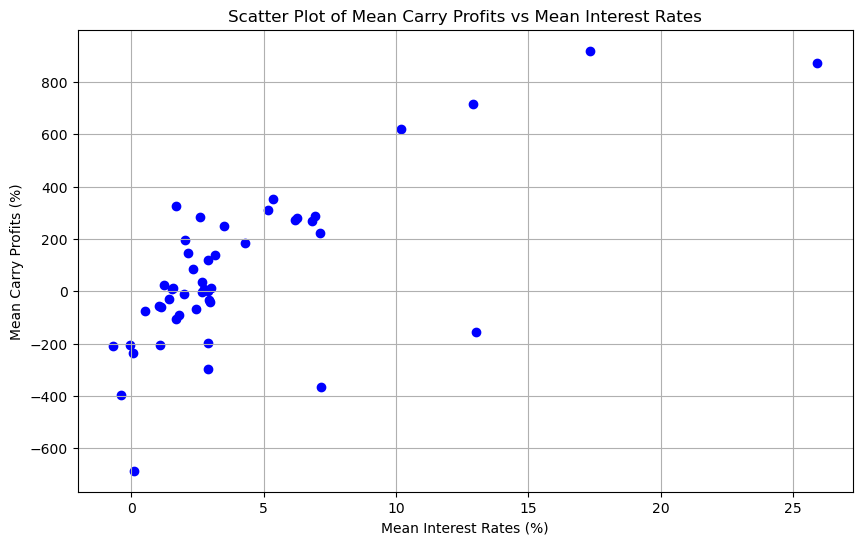

In [12]:
# Calculate mean carry profits and mean interest rates for each country
mean_carry_profits = data.groupby('country')['NetCarryReturnAdjusted'].mean() * 12 * 100 
mean_interest_rates = data.groupby('country')['InterestRate'].mean()  

regression_data = pd.DataFrame({
    'MeanCarryProfits': mean_carry_profits,
    'MeanInterestRates': mean_interest_rates
}).dropna()

X = regression_data['MeanInterestRates']
y = regression_data['MeanCarryProfits']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

plt.figure(figsize=(10, 6))
plt.scatter(regression_data['MeanInterestRates'], regression_data['MeanCarryProfits'], color='blue')
plt.xlabel('Mean Interest Rates (%)')
plt.ylabel('Mean Carry Profits (%)')
plt.title('Scatter Plot of Mean Carry Profits vs Mean Interest Rates')
plt.grid(True)
plt.show()

In [13]:
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:       MeanCarryProfits   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     50.29
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           6.65e-09
Time:                        19:23:32   Log-Likelihood:                -324.39
No. Observations:                  48   AIC:                             652.8
Df Residuals:                      46   BIC:                             656.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -115.1136     40.43

According to UIP, the interest rate differential between two countries should be offset by the expected change in exchange rates. Therefore, there should be no systematic opportunity to earn profits from carry trades if UIP holds. 

Findings: The positive and significant slope coefficient suggests that higher interest rates are associated with higher carry profits. This evidence can be interpreted as a violation of the UIP theory, as it implies the existence of systematic profits from carry trades.

# Question - 6

In [14]:
# Filter data for each December to get interest rates
december_data = data[data['month'] == 12]

december_interest_rates = december_data.groupby(['year', 'country'])['InterestRate'].last().reset_index()

december_interest_rates['rank'] = december_interest_rates.groupby('year')['InterestRate'].rank(method='first')

num_portfolios = 8

# For each year, divide the countries into 8 portfolios
december_interest_rates['portfolio'] = december_interest_rates.groupby('year')['rank'].transform(
    lambda x: pd.qcut(x, num_portfolios, labels=False) + 1
)

december_interest_rates['portfolio_year'] = december_interest_rates['year'] + 1

merged_data = pd.merge(data, december_interest_rates[['country', 'portfolio_year', 'portfolio']], 
                       left_on=['country', 'year'], right_on=['country', 'portfolio_year'], how='left')

merged_data.drop('portfolio_year', axis=1, inplace=True)

# Calculating carry trade strategy with monthly conversion

principal = 100

merged_data['MonthlyInterestRate'] = ((1 + merged_data['InterestRate'] / 100) ** (1/12)) - 1
merged_data['MonthlyUSRate'] = ((1 + merged_data['USr'] / 100) ** (1/12)) - 1

# Step 1: Calculate the cost of borrowing in USD (monthly)
merged_data['borrowing_cost_usd'] = principal * merged_data['MonthlyUSRate']

# Step 2: Convert borrowed USD to foreign currency
merged_data['borrowed_usd_in_foreign'] = principal * merged_data['Exrate']

# Step 3: Calculate the return on investment in foreign currency (monthly)
merged_data['investment_return_end_of_month_foreign'] = merged_data['borrowed_usd_in_foreign'] * (1 + merged_data['MonthlyInterestRate'])

# Step 4: Convert the return on investment back to USD using next month's exchange rate
merged_data['NextMonthExchangeRate'] = merged_data.groupby('country')['Exrate'].shift(-1)

# Drop NaN values
filtered_data = merged_data.dropna(subset=['NextMonthExchangeRate'])

# Recalculate the return on investment in USD on the filtered data
filtered_data['investment_return_end_of_month_usd'] = filtered_data['investment_return_end_of_month_foreign'] / filtered_data['NextMonthExchangeRate']

# Step 5: Calculate net monthly carry return
filtered_data['NetCarryReturnAdjusted'] = filtered_data['investment_return_end_of_month_usd'] - (principal + filtered_data['borrowing_cost_usd'])

portfolio_carry_profit = filtered_data.groupby(['year', 'month', 'portfolio'])['NetCarryReturnAdjusted'].mean().reset_index()

portfolio_carry_profit

,year,month,portfolio,NetCarryReturnAdjusted
0,1991,1,1.0,-7.865822e-09
1,1991,1,4.0,-2.975436e+00
2,1991,1,8.0,5.397727e-01
3,1991,2,1.0,7.869161e-09
4,1991,2,4.0,-9.575660e+00
...,...,...,...,...
2827,2022,3,4.0,-3.462497e+00
2828,2022,3,5.0,-3.405226e+00
2829,2022,3,6.0,-3.791441e+00
2830,2022,3,7.0,-2.621794e+00


# Question - 7

In [15]:
merged_df = pd.merge(portfolio_carry_profit, data[['year', 'month', 'mktrf']], on=['year', 'month'], how='left')

In [16]:
results = []
for portfolio in merged_df['portfolio'].unique():
    subset = merged_df[merged_df['portfolio'] == portfolio]
    X = sm.add_constant(subset['mktrf'])  
    y = subset['NetCarryReturnAdjusted']
    model = sm.OLS(y, X, missing='drop').fit()
    results.append((portfolio, model.params['const'], model.params['mktrf'], model.rsquared))

In [17]:
results_df = pd.DataFrame(results, columns=['Portfolio', 'Intercept (a_p)', 'Carry-Beta (beta_p)', 'R-squared'])
print(results_df)

   Portfolio  Intercept (a_p)  Carry-Beta (beta_p)  R-squared
0        1.0        -0.118180            -1.824141   0.002928
1        4.0         0.042010            -5.478504   0.009714
2        8.0         0.356270             7.973021   0.019596
3        3.0        -0.022404            -4.828386   0.008156
4        6.0         0.130243            -1.612949   0.001071
5        2.0        -0.059543            -2.480336   0.002780
6        5.0         0.161516            -2.588462   0.003095
7        7.0         0.116915             0.974372   0.000337


# Question - 8

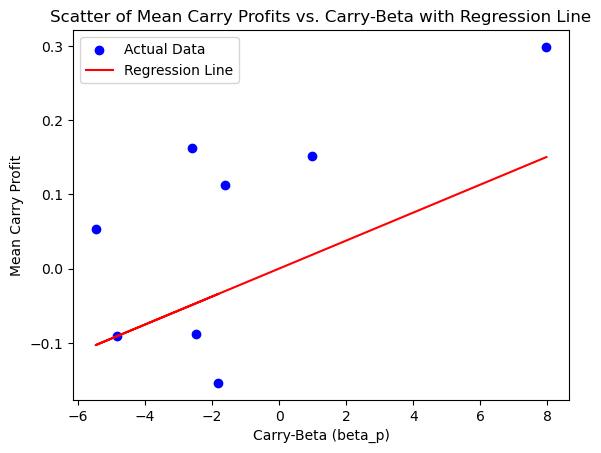

In [18]:
# Step 1: Calculate Mean Carry Profits for Each Portfolio
mean_carry_profits = portfolio_carry_profit.groupby('portfolio')['NetCarryReturnAdjusted'].mean().reset_index()

# Step 2: Extract Carry-Beta for Each Portfolio
carry_beta = results_df[['Portfolio', 'Carry-Beta (beta_p)']]

# Step 3: Merge Mean Carry Profits with Carry-Beta
regression_data = pd.merge(mean_carry_profits, carry_beta, left_on='portfolio', right_on='Portfolio')

# Step 4: Run the Regression without an intercept
X = regression_data['Carry-Beta (beta_p)']
y = regression_data['NetCarryReturnAdjusted']
model = sm.OLS(y, X).fit()

theta = model.params['Carry-Beta (beta_p)']
r_squared = model.rsquared

plt.scatter(regression_data['Carry-Beta (beta_p)'], regression_data['NetCarryReturnAdjusted'], color='blue', label='Actual Data')
predicted_carry = theta * regression_data['Carry-Beta (beta_p)']
plt.plot(regression_data['Carry-Beta (beta_p)'], predicted_carry, color='red', label='Regression Line')
plt.xlabel('Carry-Beta (beta_p)')
plt.ylabel('Mean Carry Profit')
plt.title('Scatter of Mean Carry Profits vs. Carry-Beta with Regression Line')
plt.legend()
plt.show()

In [19]:
# Print theta and R-squared
print("Theta (Coefficient):", theta)
print("R-squared:", r_squared)

Theta (Coefficient): 0.018844011149884297
R-squared: 0.24990484427316728


In [20]:
# Annualize theta
theta_annual = theta * 12
theta_annual

0.22612813379861157

# Question - 9

In the report

# Question - 10

In [21]:
# Filter the dataset for India's data
india_data = data[data['country'] == 'India'].copy()

principal = 100

india_data['MonthlyInterestRate'] = ((1 + india_data['InterestRate'] / 100) ** (1/12)) - 1
india_data['MonthlyUSRate'] = ((1 + india_data['USr'] / 100) ** (1/12)) - 1

# Step 1: Calculate the cost of borrowing in USD (monthly)
india_data['borrowing_cost_usd'] = principal * india_data['MonthlyUSRate']

# Step 2: Convert borrowed USD to Indian Rupees
india_data['borrowed_usd_in_inr'] = principal * india_data['Exrate']

# Step 3: Calculate the return on investment in Indian Rupees (monthly)
india_data['investment_return_end_of_month_inr'] = india_data['borrowed_usd_in_inr'] * (1 + india_data['MonthlyInterestRate'])

# Step 4: Convert the return on investment back to USD using next month's exchange rate
india_data['NextMonthExchangeRate'] = india_data['Exrate'].shift(-1)

# Drop NaN
india_filtered = india_data.dropna(subset=['NextMonthExchangeRate'])

india_filtered['investment_return_end_of_month_usd'] = india_filtered['investment_return_end_of_month_inr'] / india_filtered['NextMonthExchangeRate']

# Step 5: Calculate net monthly carry return
india_filtered['MonthlyCarryProfit'] = india_filtered['investment_return_end_of_month_usd'] - (principal + india_filtered['borrowing_cost_usd'])

X = sm.add_constant(india_filtered['mktrf'])  
y = india_filtered['MonthlyCarryProfit']
india_carry_regression = sm.OLS(y, X, missing='drop').fit()

india_carry_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     MonthlyCarryProfit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.02326
Date:                Wed, 22 Nov 2023   Prob (F-statistic):              0.879
Time:                        19:23:33   Log-Likelihood:                -556.80
No. Observations:                 262   AIC:                             1118.
Df Residuals:                     260   BIC:                             1125.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2203      0.127      1.737      0.084      -0.029       0.470
mktrf          0.4265      2.797      0.153      0.879      -5.080       5.933
==============================================================================
Omnibus:                       20.936   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.887
Skew:                          -0.081   Prob(JB):                     5.48e-17
Kurtosis:                       5.614   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Extract India's Carry-Beta
india_carry_beta = india_carry_regression.params['mktrf']

print(f"India's Carry-Beta: {india_carry_beta}")
print(india_carry_regression.summary())

# Calculate Expected Annual Carry Profit for India
expected_annual_carry_profit_for_india = theta_annual * india_carry_beta

print("Expected Annual Carry Profit for India:", expected_annual_carry_profit_for_india)

# Compare the expected annual carry profit with the actual average annual carry profit for India
actual_average_annual_carry_profit = india_filtered['MonthlyCarryProfit'].mean() * 12
print("Actual Average Annual Carry Profit for India:", actual_average_annual_carry_profit)

# Determine if the Indian Rupee is overvalued or undervalued
if actual_average_annual_carry_profit > expected_annual_carry_profit_for_india:
    print("The Indian Rupee is potentially undervalued.")
elif actual_average_annual_carry_profit < expected_annual_carry_profit_for_india:
    print("The Indian Rupee is potentially overvalued.")
else:
    print("The Indian Rupee is valued as expected based on carry profits.")

India's Carry-Beta: 0.4264869377361218
                            OLS Regression Results                            
Dep. Variable:     MonthlyCarryProfit   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.02326
Date:                Wed, 22 Nov 2023   Prob (F-statistic):              0.879
Time:                        19:23:33   Log-Likelihood:                -556.80
No. Observations:                 262   AIC:                             1118.
Df Residuals:                     260   BIC:                             1125.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        